<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff


drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
gws = sqlite3.connect('/content/drive/My Drive/fpl.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
#gws1=pd.read_csv(io.StringIO(uploaded['gws.csv'].decode('utf-8')),sep=',')
gws.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
0,Aaron_Cresswell,0,0,0,0,0,454,10,0,0,0,0,2016-08-15T19:00:00Z,0,4,0,0,0,0,1,0,14023,1,2,0,0,0,0,0,55,FALSE,0
1,Aaron_Lennon,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,0,0,0,0,1,0,13918,1,1,0,1,0,0,0,60,TRUE,0
2,Aaron_Ramsey,0,0,5,0,4.9,16,8,3,0,3,2.2,2016-08-14T15:00:00Z,60,9,0,0,0,0,1,0,163170,4,3,23,2,0,0,0,80,TRUE,0
3,Abdoulaye_Doucour�,0,0,0,0,0,482,7,0,0,0,0,2016-08-13T14:00:00Z,0,13,0,0,0,0,1,0,1051,1,1,0,0,0,0,0,50,FALSE,0
4,Abdul Rahman_Baba,0,0,0,0,0,80,10,0,0,0,0,2016-08-15T19:00:00Z,0,20,0,0,0,0,1,0,1243,1,2,0,0,0,0,0,55,TRUE,0


In [74]:
gws.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards'],
      dtype='object')

In [75]:
gws=gws.astype({'name':'category','assists':int, 'bonus':int, 'bps':int, 'clean_sheets':'category',
       'creativity':float,'element':int,'goals_conceded':int,
       'goals_scored':int, 'ict_index':float, 'influence':float,'minutes':int, 'opponent_team':int, 'own_goals':int,'penalties_missed':int, 'penalties_saved':int,
       'red_cards':int, 'round':int, 'saves':int, 'selected':int,
        'team_a_score':int, 'team_h_score':int,'threat':float,
       'total_points':int, 'transfers_balance':int, 'transfers_in':int, 'transfers_out':int,
       'value':int, 'yellow_cards':int})

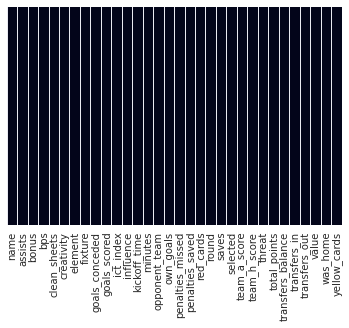

In [76]:
sns.set_style('dark')
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False)

In [77]:
gws = gws.assign(id=(gws['name']).astype('category').cat.codes)


In [78]:
def fd(x):
  x=int(x)
  if x<=6:
    return '3'
  elif x>6 and x<=14:
    return '1'
  else:
    return '2'

In [79]:
gws.rename(columns={'opponent_team':'fdr'},inplace=True)


In [80]:
gws['fdr']=gws['fdr'].apply(fd)


In [81]:
gws['kickoff_time']=pd.to_datetime(gws['kickoff_time'])

In [82]:
gws['kickoff_time'] = gws.kickoff_time.dt.hour


In [83]:
def time(x):
  x=int(x)
  if x>8 and x<=12:
    return '0'
  elif x>12 and x<=18:
    return '1'
  else:
    return '2'

In [84]:
gws['kickoff_time']=gws['kickoff_time'].apply(time)
gws.head(20)

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,id
0,Aaron_Cresswell,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2,0,3,0,0,0,0,1,0,14023,1,2,0.0,0,0,0,0,55,FALSE,0,1
1,Aaron_Lennon,0,0,6,0,0.3,142,3,0,0,0.9,8.2,1,15,2,0,0,0,0,1,0,13918,1,1,0.0,1,0,0,0,60,TRUE,0,4
2,Aaron_Ramsey,0,0,5,0,4.9,16,8,3,0,3.0,2.2,1,60,1,0,0,0,0,1,0,163170,4,3,23.0,2,0,0,0,80,TRUE,0,12
3,Abdoulaye_Doucour�,0,0,0,0,0.0,482,7,0,0,0.0,0.0,1,0,1,0,0,0,0,1,0,1051,1,1,0.0,0,0,0,0,50,FALSE,0,23
4,Abdul Rahman_Baba,0,0,0,0,0.0,80,10,0,0,0.0,0.0,2,0,2,0,0,0,0,1,0,1243,1,2,0.0,0,0,0,0,55,TRUE,0,25
5,Abel_Hern�ndez,1,0,10,0,12.2,163,4,1,0,5.7,14.4,0,90,1,0,0,0,0,1,0,26039,1,2,30.0,5,0,0,0,60,TRUE,0,26
6,Adama_Diomande,0,2,29,0,16.8,164,4,1,1,10.7,45.2,0,90,1,0,0,0,0,1,0,38151,1,2,45.0,8,0,0,0,45,TRUE,0,46
7,Adam_Clayton,0,0,6,0,2.2,283,6,1,0,1.4,3.2,1,90,1,0,0,0,0,1,0,17663,1,1,9.0,2,0,0,0,45,TRUE,0,29
8,Adam_Federici,0,0,0,0,0.0,30,9,0,0,0.0,0.0,0,0,1,0,0,0,0,1,0,4315,3,1,0.0,0,0,0,0,45,TRUE,0,30
9,Adam_Forshaw,0,0,3,0,1.3,286,6,1,0,0.3,2.0,1,69,1,0,0,0,0,1,0,2723,1,1,0.0,1,0,0,0,45,TRUE,1,31


In [85]:
def was_home(x):
  if x=="FALSE":
    return 0
  else:
    return 1

In [86]:
gws['home']=gws['was_home'].apply(was_home)

In [87]:
gws.drop(['element','was_home','fixture','round','transfers_balance','transfers_in','transfers_out','team_a_score',	'team_h_score','round'],axis=1, inplace=True)

In [88]:
gws.head()

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home
0,Aaron_Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2,0,3,0,0,0,0,0,14023,0.0,0,55,0,1,0
1,Aaron_Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1,15,2,0,0,0,0,0,13918,0.0,1,60,0,4,1
2,Aaron_Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1,60,1,0,0,0,0,0,163170,23.0,2,80,0,12,1
3,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1,0,1,0,0,0,0,0,1051,0.0,0,50,0,23,0
4,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,2,0,2,0,0,0,0,0,1243,0.0,0,55,0,25,1


In [95]:
gws1=gws.copy()


In [96]:
gws1['Last_Week_Points'] = gws1.groupby(['id'])['total_points'].shift()
gws1['Last_2_Week_Points'] = gws1.groupby(['id'])['total_points'].shift(2)

gws1['Last_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift()
gws1['Last_2_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(2)

gws1['Last_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift()
gws1['Last_2_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(2)

gws1['Last_Week_BPS'] = gws1.groupby(['id'])['bps'].shift()
gws1['Last_2_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(2)

gws1['Last_Week_Assists'] = gws1.groupby(['id'])['assists'].shift()
gws1['Last_2_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(2)

gws1['Last_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift()
gws1['Last_2_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(2)

gws1['Last_Week_Influence'] = gws1.groupby(['id'])['influence'].shift()
gws1['Last_2_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(2)

gws1['Last_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift()
gws1['Last_2_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(2)

gws1['Last_Week_Threat'] = gws1.groupby(['id'])['threat'].shift()
gws1['Last_2_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(2)

gws1['Last_Week_Selected'] = gws1.groupby(['id'])['selected'].shift()
gws1['Last_2_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(2)

gws1['Last_Week_Value'] = gws1.groupby(['id'])['value'].shift()
gws1['Last_2_Week_Value'] = gws1.groupby(['id'])['value'].shift(2)

gws1['Last_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift()
gws1['Last_2_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift(2)


gws1['Last_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift()
gws1['Last_2_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift(2)

gws1['Last_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift()
gws1['Last_2_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift(2)

gws1['Last_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift()
gws1['Last_2_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift(2)

gws1['Last_Week_Goals_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift()
gws1['Last_2_Week_Goals_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift(2)

gws1['Last_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift()
gws1['Last_2_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift(2)

gws1['Last_Week_Penalties_Missed'] = gws1.groupby(['id'])['penalties_missed'].shift()
gws1['Last_2_Week_Penalties_Missed'] = gws1.groupby(['id'])['penalties_missed'].shift(2)

gws1['Last_Week_Penalties_Saved'] = gws1.groupby(['id'])['penalties_saved'].shift()
gws1['Last_2_Week_Penalties_Saved'] = gws1.groupby(['id'])['penalties_saved'].shift(2)

gws1['Last_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift()
gws1['Last_2_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift(2)

gws1['Last_Week_Saves'] = gws1.groupby(['id'])['saves'].shift()
gws1['Last_2_Week_Saves'] = gws1.groupby(['id'])['saves'].shift(2)

gws1['Last_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift()
gws1['Last_2_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift(2)

gws1['Last_Week_Home'] = gws1.groupby(['id'])['home'].shift()
gws1['Last_2_Week_Home'] = gws1.groupby(['id'])['home'].shift(2)


gws1.head(900)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_Week_Threat,Last_2_Week_Threat,Last_Week_Selected,Last_2_Week_Selected,Last_Week_Value,Last_2_Week_Value,Last_Week_Creativity,Last_2_Week_Creativity,Last_Week_FDR,Last_2_Week_FDR,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Goals_Kickoff_Time,Last_2_Week_Goals_Kickoff_Time,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Penalties_Saved,Last_2_Week_Penalties_Saved,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Last_Week_Home,Last_2_Week_Home
0,Aaron_Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2,0,3,0,0,0,0,0,14023,0.0,0,55,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron_Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1,15,2,0,0,0,0,0,13918,0.0,1,60,0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron_Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1,60,1,0,0,0,0,0,163170,23.0,2,80,0,12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1,0,1,0,0,0,0,0,1051,0.0,0,50,0,23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,2,0,2,0,0,0,0,0,1243,0.0,0,55,0,25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Maarten_Stekelenburg,0,0,0,0,0.0,0,0,0.0,0.0,1,0,2,0,0,0,0,0,203625,0.0,0,51,0,1335,1,3.0,NaN,0.0,NaN,2.2,NaN,15.0,NaN,0.0,NaN,0.0,NaN,21.8,NaN,90.0,NaN,0.0,NaN,31420.0,NaN,50.0,NaN,0.0,NaN,2,NaN,0,NaN,1.0,NaN,1,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,3.0,NaN,0.0,NaN,1.0,NaN
896,Maksymilian_Stryjek,0,0,0,0,0.0,0,0,0.0,0.0,0,0,3,0,0,0,0,0,2692,0.0,0,40,0,1340,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897,Mamadou Obbi_Oular�,0,0,0,0,0.0,0,0,0.0,0.0,1,0,1,0,0,0,0,0,469,0.0,0,45,0,1341,1,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,574.0,NaN,45.0,NaN,0.0,NaN,1,NaN,0,NaN,0.0,NaN,1,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
898,Mamadou_Sakho,0,0,0,0,0.0,0,0,0.0,0.0,1,0,3,0,0,0,0,0,3686,0.0,0,47,0,1342,0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,3971.0,NaN,50.0,NaN,0.0,NaN,3,NaN,0,NaN,0.0,NaN,1,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [98]:
gws1['Last_Week_Diff_Points'] = gws1.groupby(['id'])['Last_Week_Points'].diff()
gws1['Last_2_Week_Diff_Points'] = gws1.groupby(['id'])['Last_2_Week_Points'].diff()





gws1['Last_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_Week_Goals'].diff()
gws1['Last_2_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_2_Week_Goals'].diff()



gws1['Last_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_Week_BPS'].diff()
gws1['Last_2_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_2_Week_BPS'].diff()



gws1['Last_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_Week_ICT'].diff()
gws1['Last_2_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_2_Week_ICT'].diff()




gws1['Last_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_Week_Assists'].diff()
gws1['Last_2_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_2_Week_Assists'].diff()




gws1['Last_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_Week_Bonus'].diff()
gws1['Last_2_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_2_Week_Bonus'].diff()



gws1['Last_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_Week_Influence'].diff()
gws1['Last_2_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_2_Week_Influence'].diff()




gws1['Last_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_Week_Threat'].diff()
gws1['Last_2_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_2_Week_Threat'].diff()



gws1['Last_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_Week_Selected'].diff()
gws1['Last_2_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_2_Week_Selected'].diff()


gws1['Last_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_Week_Minutes_Played'].diff()
gws1['Last_2_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_2_Week_Minutes_Played'].diff()


gws1['Last_Week_Diff_Value'] = gws1.groupby(['id'])['Last_Week_Value'].diff()
gws1['Last_2_Week_Diff_Value'] = gws1.groupby(['id'])['Last_2_Week_Value'].diff()


gws1['Last_Week_Diff_Creativity'] = gws1.groupby(['id'])['Last_Week_Creativity'].diff()
gws1['Last_2_Week_Diff_Creativity'] = gws1.groupby(['id'])['Last_2_Week_Creativity'].diff()


gws1['Last_Week_Diff_Goals_Conceded'] = gws1.groupby(['id'])['Last_Week_Goals_Conceded'].diff()
gws1['Last_2_Week_Diff_Goals_Conceded'] = gws1.groupby(['id'])['Last_2_Week_Goals_Conceded'].diff()

gws1['Last_Week_Diff_Saves'] = gws1.groupby(['id'])['Last_Week_Saves'].diff()
gws1['Last_2_Week_Diff_Saves'] = gws1.groupby(['id'])['Last_2_Week_Saves'].diff()


In [101]:
gws1['Form Points'] = gws1['total_points'].rolling(window=2).mean().shift(1)

gws1['Form Goals'] = gws1['goals_scored'].rolling(window=2).mean().shift(1)

gws1['Form ICT'] = gws1['ict_index'].rolling(window=2).mean().shift(1)

gws1['Form Influence'] = gws1['influence'].rolling(window=2).mean().shift(1)

gws1['Form Threat'] = gws1['threat'].rolling(window=2).mean().shift(1)

gws1['Form BPS'] = gws1['bps'].rolling(window=2).mean().shift(1)

gws1['Form Bonus'] = gws1['bonus'].rolling(window=2).mean().shift(1)

gws1['Form Assists'] = gws1['assists'].rolling(window=2).mean().shift(1)

gws1['Form Minutes_Played'] = gws1['minutes'].rolling(window=2).mean().shift(1)

gws1['Form Selected'] = gws1['selected'].rolling(window=2).mean().shift(1)

gws1['Form Value'] = gws1['value'].rolling(window=2).mean().shift(1)

gws1['Form Clean Sheets'] = gws1['clean_sheets'].rolling(window=2).mean().shift(1)

gws1['Form Goals Conceded'] = gws1['goals_conceded'].rolling(window=2).mean().shift(1)

gws1['Form Own Goals'] = gws1['own_goals'].rolling(window=2).mean().shift(1)

gws1['Form Penalties Missed'] = gws1['penalties_missed'].rolling(window=2).mean().shift(1)

gws1['Form Penalties Saved'] = gws1['penalties_saved'].rolling(window=2).mean().shift(1)

gws1['Form Yellow Cards'] = gws1['yellow_cards'].rolling(window=2).mean().shift(1)

gws1['Form Red Cards'] = gws1['red_cards'].rolling(window=2).mean().shift(1)

gws1.head(700)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,...,Last_Week_Diff_ICT,Last_2_Week_Diff_ICT,Last_Week_Diff_Assists,Last_2_Week_Diff_Assists,Last_Week_Diff_Bonus,Last_2_Week_Diff_Bonus,Last_Week_Diff_Influence,Last_2_Week_Diff_Influence,Last_Week_Diff_Threat,Last_2_Week_Diff_Threat,Last_Week_Diff_Selected,Last_2_Week_Diff_Selected,Last_Week_Diff_Minutes_Played,Last_2_Week_Diff_Minutes_Played,Last_Week_Diff_Value,Last_2_Week_Diff_Value,Last_Week_Diff_Creativity,Last_2_Week_Diff_Creativity,Last_Week_Diff_Goals_Conceded,Last_2_Week_Diff_Goals_Conceded,Last_Week_Diff_Saves,Last_2_Week_Diff_Saves,Form Points,Form Goals,Form ICT,Form Influence,Form Threat,Form BPS,Form Bonus,Form Assists,Form Minutes_Played,Form Selected,Form Value,Form Clean Sheets,Form Goals Conceded,Form Own Goals,Form Penalties Missed,Form Penalties Saved,Form Yellow Cards,Form Red Cards
0,Aaron_Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2,0,3,0,0,0,0,0,14023,0.0,0,55,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron_Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1,15,2,0,0,0,0,0,13918,0.0,1,60,0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron_Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1,60,1,0,0,0,0,0,163170,23.0,2,80,0,12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,0.45,4.100000e+00,0.0,3.0,0.0,0.0,7.5,13970.5,57.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1,0,1,0,0,0,0,0,1051,0.0,0,50,0,23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,0.0,1.95,5.200000e+00,11.5,5.5,0.0,0.0,37.5,88544.0,70.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
4,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,2,0,2,0,0,0,0,0,1243,0.0,0,55,0,25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.50,1.100000e+00,11.5,2.5,0.0,0.0,30.0,82110.5,65.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Dusan_Tadic,0,0,6,0,11.7,2,0,4.1,6.6,1,77,3,0,0,0,0,0,98813,23.0,2,72,0,608,1,2.0,NaN,0.0,NaN,18.1,NaN,17.0,NaN,0.0,NaN,0.0,NaN,32.8,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,0.0,0.30,1.421085e-14,2.0,7.5,0.0,0.5,41.5,7578.5,44.5,0.0,2.0,0.0,0.0,0.0,0.0,0.0
696,Eden_Hazard,1,3,42,1,62.8,0,1,18.0,67.8,1,90,1,0,0,0,0,0,772644,49.0,14,98,0,615,0,10.0,NaN,1.0,NaN,9.2,NaN,33.0,NaN,0.0,NaN,3.0,NaN,44.2,NaN,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.05,3.300000e+00,11.5,3.0,0.0,0.0,38.5,54675.0,56.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
697,Edimilson_Fernandes,0,0,5,0,2.3,1,0,1.2,1.4,1,70,3,0,0,0,0,0,516,8.0,2,49,0,620,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [102]:
gws1=gws1.dropna()


In [103]:
gws1.head()

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,...,Last_Week_Diff_ICT,Last_2_Week_Diff_ICT,Last_Week_Diff_Assists,Last_2_Week_Diff_Assists,Last_Week_Diff_Bonus,Last_2_Week_Diff_Bonus,Last_Week_Diff_Influence,Last_2_Week_Diff_Influence,Last_Week_Diff_Threat,Last_2_Week_Diff_Threat,Last_Week_Diff_Selected,Last_2_Week_Diff_Selected,Last_Week_Diff_Minutes_Played,Last_2_Week_Diff_Minutes_Played,Last_Week_Diff_Value,Last_2_Week_Diff_Value,Last_Week_Diff_Creativity,Last_2_Week_Diff_Creativity,Last_Week_Diff_Goals_Conceded,Last_2_Week_Diff_Goals_Conceded,Last_Week_Diff_Saves,Last_2_Week_Diff_Saves,Form Points,Form Goals,Form ICT,Form Influence,Form Threat,Form BPS,Form Bonus,Form Assists,Form Minutes_Played,Form Selected,Form Value,Form Clean Sheets,Form Goals Conceded,Form Own Goals,Form Penalties Missed,Form Penalties Saved,Form Yellow Cards,Form Red Cards
1721,Aaron_Cresswell,0,0,13,0,2.8,3,0,1.3,8.4,1,90,2,0,0,0,0,0,16187,2.0,1,53,0,1,0,2.0,1.0,0.0,0.0,2.0,1.3,13.0,12.0,0.0,0.0,0.0,0.0,14.4,5.4,90.0,...,0.7,1.3,0.0,0.0,0.0,0.0,9.0,5.4,4.0,0.0,2366.0,-1385.0,0.0,90.0,0.0,-2.0,-6.0,7.9,-1.0,2.0,0.0,0.0,1.0,0.0,1.05,1.9,6.5,1.5,0.0,0.0,45.0,273382.0,55.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1722,Aaron_Lennon,0,0,6,0,3.2,1,0,0.6,0.0,1,65,2,0,0,0,0,0,7501,4.0,2,56,0,4,1,1.0,1.0,0.0,0.0,0.7,0.4,6.0,6.0,0.0,0.0,0.0,0.0,5.6,3.2,31.0,...,0.3,-0.5,0.0,0.0,0.0,0.0,2.4,-5.0,0.0,0.0,-108.0,-6259.0,27.0,-11.0,0.0,-4.0,1.3,0.0,1.0,0.0,0.0,0.0,1.5,0.0,1.70,6.1,7.5,8.0,0.0,0.0,90.0,280104.5,58.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1723,Aaron_Ramsey,0,0,-1,0,8.8,1,0,1.1,0.4,0,90,1,0,0,0,0,0,42010,2.0,1,76,1,12,0,1.0,4.0,0.0,0.0,0.5,4.8,2.0,13.0,0.0,1.0,0.0,0.0,0.0,16.0,26.0,...,-4.3,1.8,-1.0,1.0,0.0,0.0,-16.0,13.8,-6.0,-13.0,2288.0,-123444.0,12.0,-46.0,0.0,-4.0,-19.4,16.9,0.0,-3.0,0.0,0.0,1.5,0.0,0.95,4.2,3.0,9.5,0.0,0.0,77.5,11844.0,54.5,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1724,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1,0,1,0,0,0,0,0,664,0.0,0,46,0,23,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0,-366.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.85,0.2,3.0,2.5,0.0,0.0,77.5,24755.5,66.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0
1725,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,1,0,1,0,0,0,0,0,962,0.0,0,55,0,25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,-363.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.55,0.2,1.0,-0.5,0.0,0.0,45.0,21337.0,61.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0


In [107]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
X=gws1.drop(['name','total_points','ict_index','goals_scored','bps','assists','bonus','influence','minutes','threat','value','selected','creativity','own_goals','penalties_missed','penalties_saved','red_cards','yellow_cards','saves','selected','yellow_cards','clean_sheets','goals_conceded'],axis=1)
#X=gws1.drop(['Name','Total Points','influence','bps','bonus','ict_index'],axis=1)
y=gws1['total_points']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [108]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
#model=RandomForestRegressor()
#model=GradientBoostingRegressor()
#model=Lasso()
#model=Ridge()
model=LinearRegression()
k_fold = KFold(n_splits=2)
for train_indices, test_indices in k_fold.split(X):
  print('Train: %s | test: %s' % (train_indices, test_indices))
 
[model.fit(X_train, y_train).score(X_test, y_test)
for train, test in k_fold.split(X)]

Train: [38706 38707 38708 ... 77409 77410 77411] | test: [    0     1     2 ... 38703 38704 38705]
Train: [    0     1     2 ... 38703 38704 38705] | test: [38706 38707 38708 ... 77409 77410 77411]


[0.2743523274454427, 0.2743523274454427]

In [110]:
predict=model.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':predict,'Error':y_test-predict})
#df=pd.DataFrame(a,index=[0])
df.head(50)

,Actual,Predicted,Error
14126,0,1.007684,-1.007684
26955,0,0.856569,-0.856569
77955,0,0.071841,-0.071841
30133,1,2.316920,-1.316920
78816,0,0.109334,-0.109334
79548,0,1.584301,-1.584301
58354,0,0.725951,-0.725951
63577,3,0.997286,2.002714
22373,2,4.545791,-2.545791
55381,0,0.944109,-0.944109


In [111]:
print(df['Error'].min())
print(df['Error'].max())

-7.920387782923794
17.2012813184677


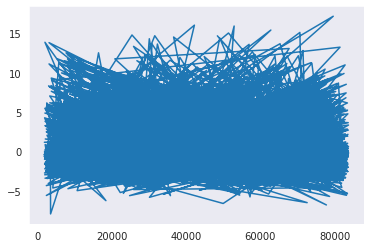

In [112]:
df['Error'].plot()

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score,classification_report
print('MAE:',mean_absolute_error(y_test,predict))
print('MSE:',mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(mean_squared_error(y_test,predict)))
print('R2 Score',r2_score(y_test,predict))


MAE: 1.2593714208272915
MSE: 4.6331345975319635
RMSE 2.1524717414014902
R2 Score 0.2743523274454427


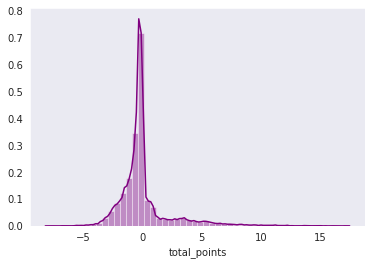

In [114]:
sns.distplot(y_test-predict,color='purple',kde=True)

In [118]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.isfinite((y_test - predict) / y_test)) * 100
error=mean_absolute_percentage_error(y_test, predict)
error

44.42937415229606